In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
pd.read_csv("Zomato data .csv")

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [26]:
df = pd.read_csv("Zomato data .csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [28]:
df = pd.read_csv("Zomato data .csv")

In [30]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


convert rating into numeric format

1. what type of restraurant do the majority of cutomers order from?

In [32]:
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if isinstance(x, str) else None)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB
None


In [39]:
online_order_df = df[df['online_order'] == 'Yes']

restaurant_type_counts = online_order_df['listed_in(type)'].value_counts()
print(restaurant_type_counts)

listed_in(type)
Dining    33
Cafes     15
other      6
Buffet     4
Name: count, dtype: int64


In [44]:
most_popular_type = restaurant_type_counts.idxmax()
count = restaurant_type_counts.max()

print(f"The majority of customers order from '{most_popular_type}' type of restaurant, with {count} restaurants offering online ordering.")

The majority of customers order from 'Dining' type of restaurant, with 33 restaurants offering online ordering.


* visualize the restaurant types using matplotlib or seaborn.

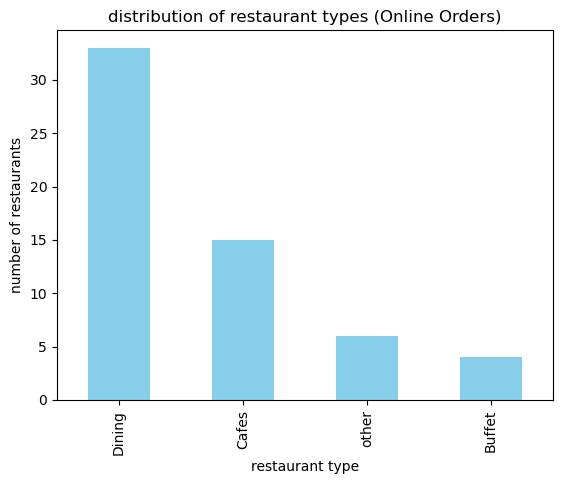

In [46]:
restaurant_type_counts.plot(kind='bar', color='skyblue')
plt.title('distribution of restaurant types (Online Orders)')
plt.xlabel('restaurant type')
plt.ylabel('number of restaurants')
plt.show()

2. How many votes has each type of restaurant recevied from customers?

In [100]:
votes_by_type = df.groupby('listed_in(type)')['votes'].sum().reset_index()
votes_by_type.columns = ['restaurant Type', 'total votes']
votes_by_type = votes_by_type.sort_values(by='total votes', )

print(votes_by_type)

  restaurant Type  total votes
0          Buffet         3028
1           Cafes         6434
3           other         9367
2          Dining        20363


* visualize the total votes of each restaurant by using bar plot:

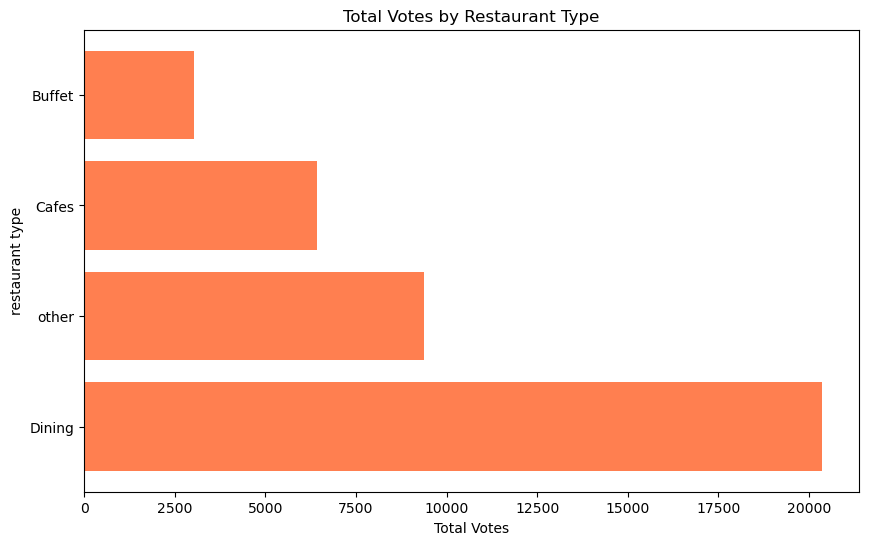

In [124]:
votes_by_type = pd.DataFrame({'restaurant type': ['Buffet', 'Cafes','other', 'Dining'],'total votes': [3028, 6434, 9367, 20363]})

votes_by_type['total votes'] = pd.to_numeric(votes_by_type['total votes'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.barh(votes_by_type['restaurant type'], votes_by_type['total votes'], color='coral')

plt.xlabel('Total Votes')
plt.ylabel('restaurant type')
plt.title('Total Votes by Restaurant Type')

plt.gca().invert_yaxis()
plt.show()


3. which mode (online or offline) has received the maximum rating?

In [135]:
average_ratings = df.groupby('online_order')['rate'].mean().reset_index()

max_rating_mode = average_ratings.loc[average_ratings['rate'].idxmax()]

print(f"mode with the maximum rating: {max_rating_mode['online_order']}")
print(f"Average rating: {max_rating_mode['rate']:.2f}")


mode with the maximum rating: Yes
Average rating: 3.86


* show the online_order(yes/no) through graph

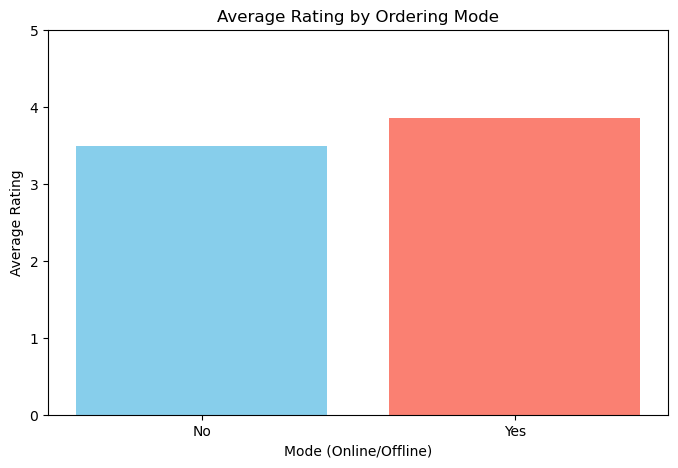

In [141]:
plt.figure(figsize=(8, 5))
plt.bar(average_ratings['online_order'], average_ratings['rate'], color=['skyblue', 'salmon'])

plt.xlabel('Mode (Online/Offline)')
plt.ylabel('Average Rating')
plt.title('Average Rating by Ordering Mode')
plt.ylim(0, 5) 

plt.show()


4. which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

In [152]:
offline_order = df[df['online_order'] == 'No']

offline_restaurant_type_counts = offline_order['listed_in(type)'].value_counts()

most_popular_offline_type = offline_restaurant_type_counts.idxmax()
count = offline_restaurant_type_counts.max()

print(f"the most offline orders in restaurant is '{most_popular_offline_type}' with {count} restaurants.")


the most offline orders in restaurant is 'Dining' with 77 restaurants.
